In [ ]:
#Thư viện để xử lý dữ liệu
import pandas as pd
import numpy as np

#Thư viện để thống kê dữ liệu
from collections import Counter

#Thư viện để token hóa dữ liệu chữ
import spacy

#Thư viện để xử lý các vấn đề của học máy và xây dựng mô hình
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional
import keras

#Thư viện để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#Load data
data = pd.read_csv('../jigsaw-toxic-comment-classification-challenge/train.csv/train.csv')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
target_columns = list(np.array(df.columns)[2:])

In [ ]:
# Thêm một số nhãn cho mục đích phân tích
df['non-toxic'] = 1 - df[target_columns].max(axis=1)
df['toxicity_type_defined'] = df[['insult','obscene','identity_hate','threat']].max(axis=1)
df['toxic_undefined'] = 0
df.loc[(df['toxicity_type_defined']==0)&(df['toxic']==1),'toxic_undefined'] = 1
df['soft_toxic'] = 0
df.loc[(df['toxicity_type_defined']==1)&(df['toxic']==0),'soft_toxic'] = 1
analysis_columns = target_columns + ['non-toxic', 'toxic_undefined', 'soft_toxic']

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non-toxic,toxicity_type_defined,toxic_undefined,soft_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,0,0,0


<ipython-input-13-d4d0be4b4905>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set3')


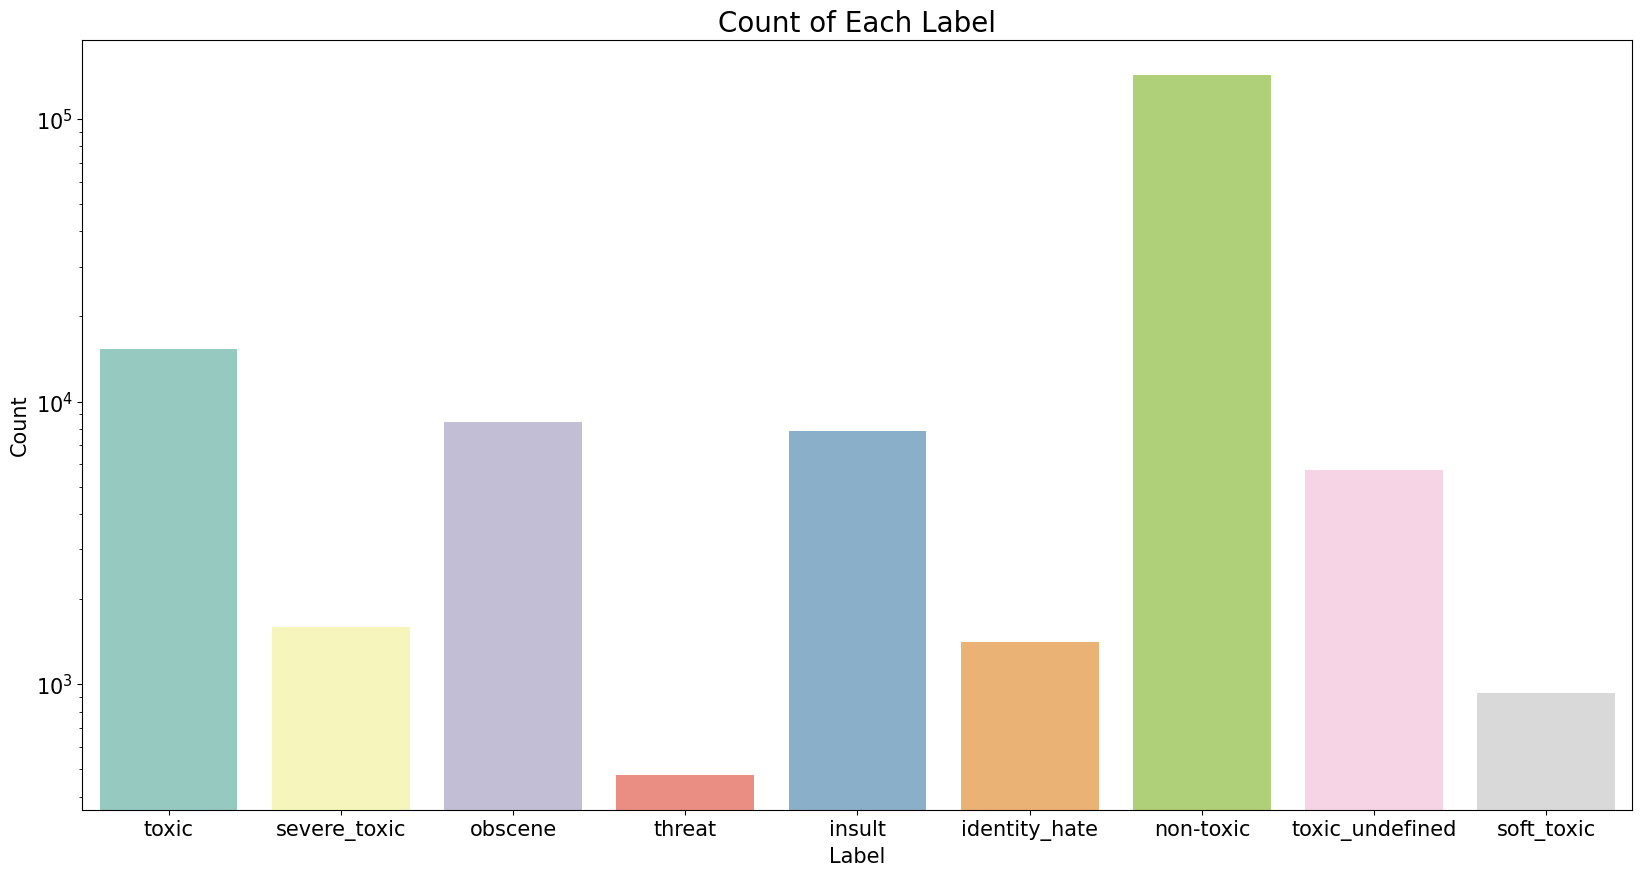

In [ ]:
# Trực quan hóa dữ liệu đã được phân tích
label_counts = df[analysis_columns].sum()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set3')
ax.set_yscale("log")
ax.tick_params(labelsize=15)
plt.xlabel('Label', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Each Label', fontsize=20)
plt.show()

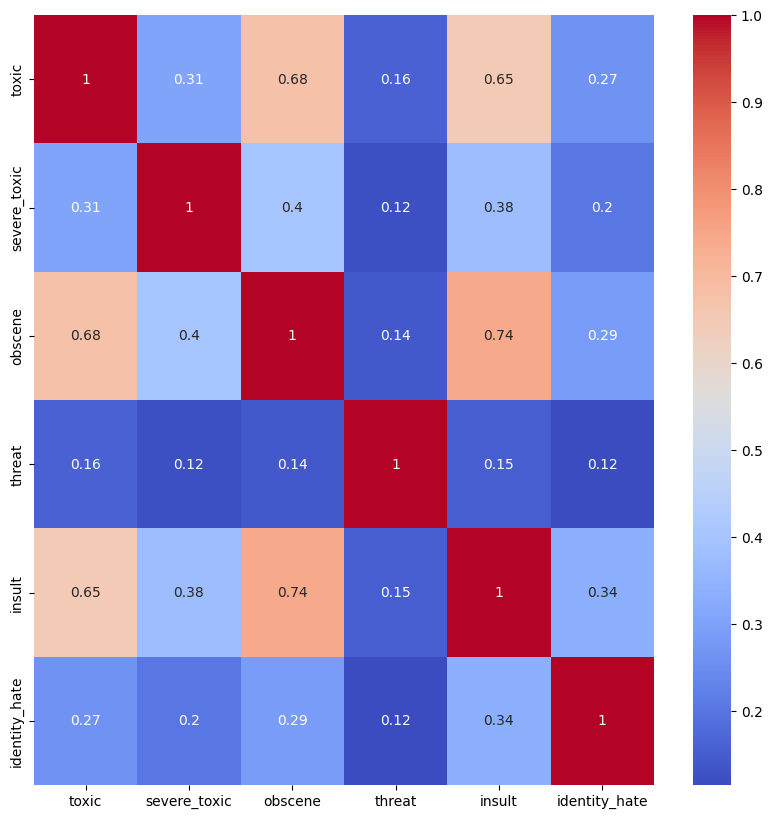

In [ ]:
# Trực quan hóa các liên kết giữa các labels
heatmap_data = df[target_columns]
plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap_data.corr(), cmap='coolwarm', annot=True)
ax.tick_params(labelsize=10)

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#Tải spacy english pipeline
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Lấy các token không có stop word bên trong
nonstop_tokens = []
for doc in nlp.pipe(df['comment_text'].astype('unicode').values, batch_size=50):
    if doc.has_annotation("DEP"):
        nonstop_tokens.append([t.lower_ for t in doc if t.is_alpha and not t.is_stop])
    else:
        nonstop_tokens.append(None)
df['nonstop_tokens'] = nonstop_tokens

<ipython-input-18-a1597263bff1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=words, y=counts, palette='Set3')
<ipython-input-18-a1597263bff1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
<ipython-input-18-a1597263bff1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=words, y=counts, palette='Set3')
<ipython-input-18-a1597263bff1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
<ipython-input-18-a1597263bff1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

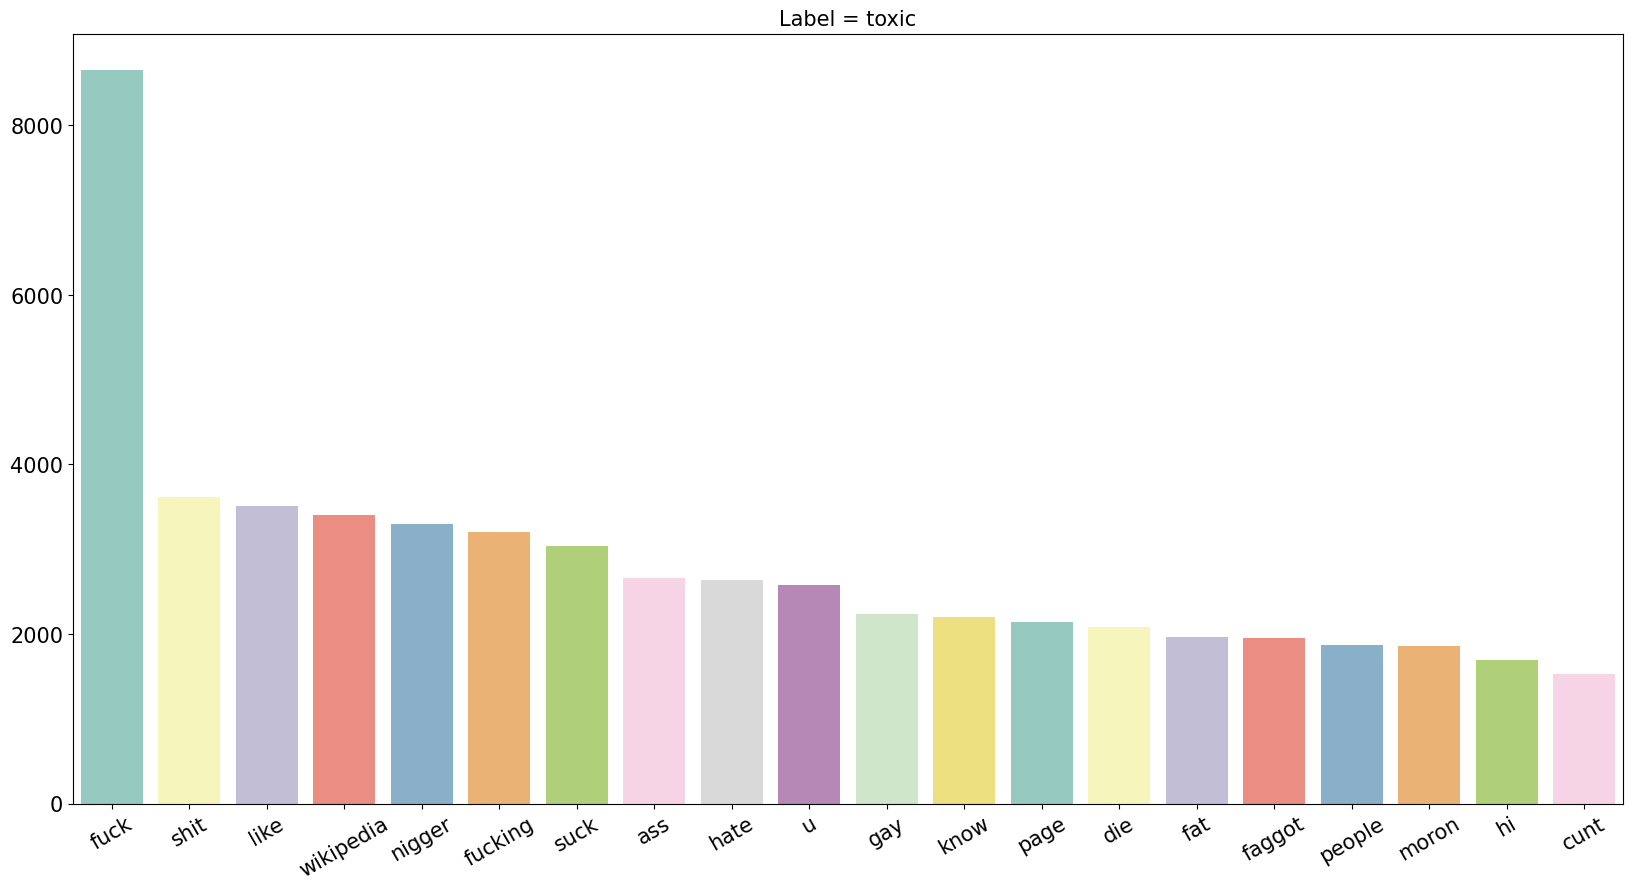

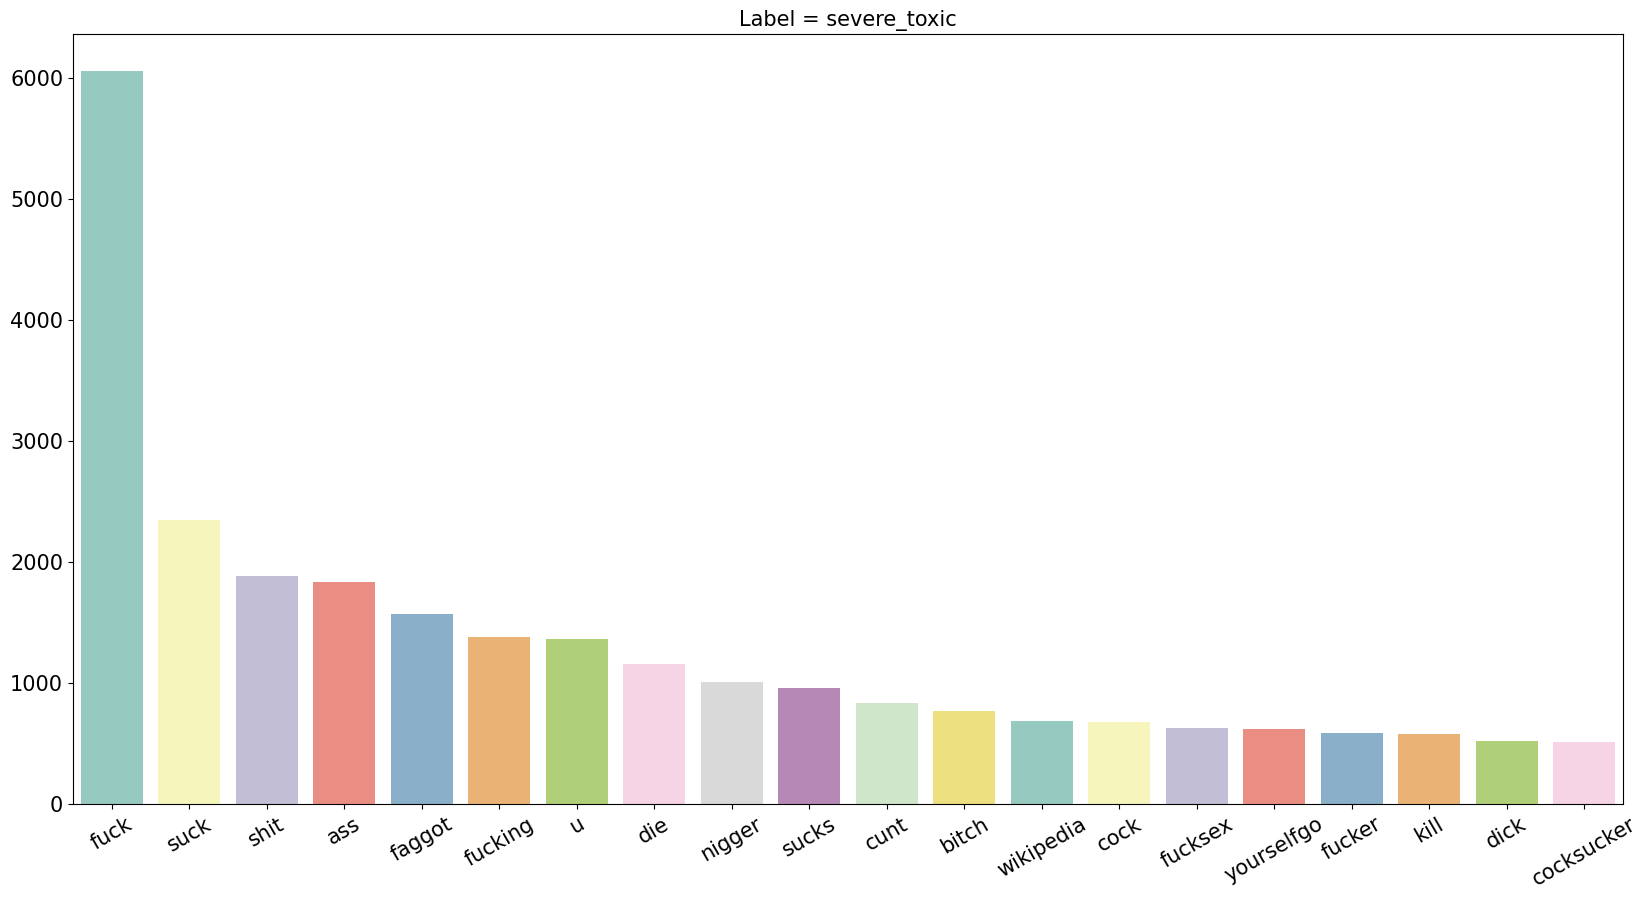

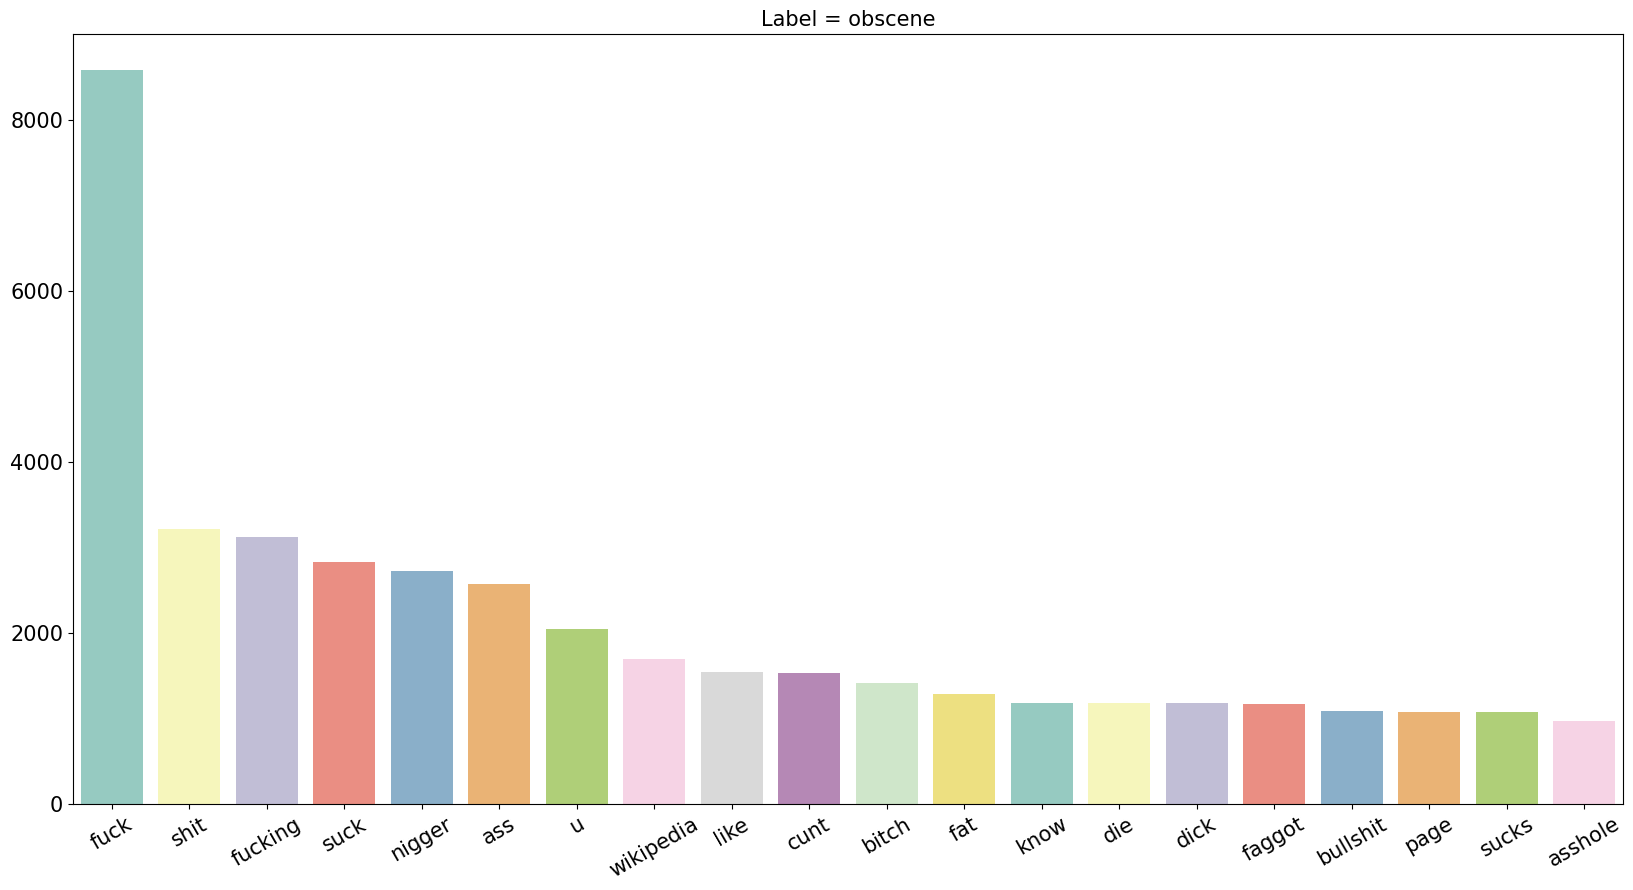

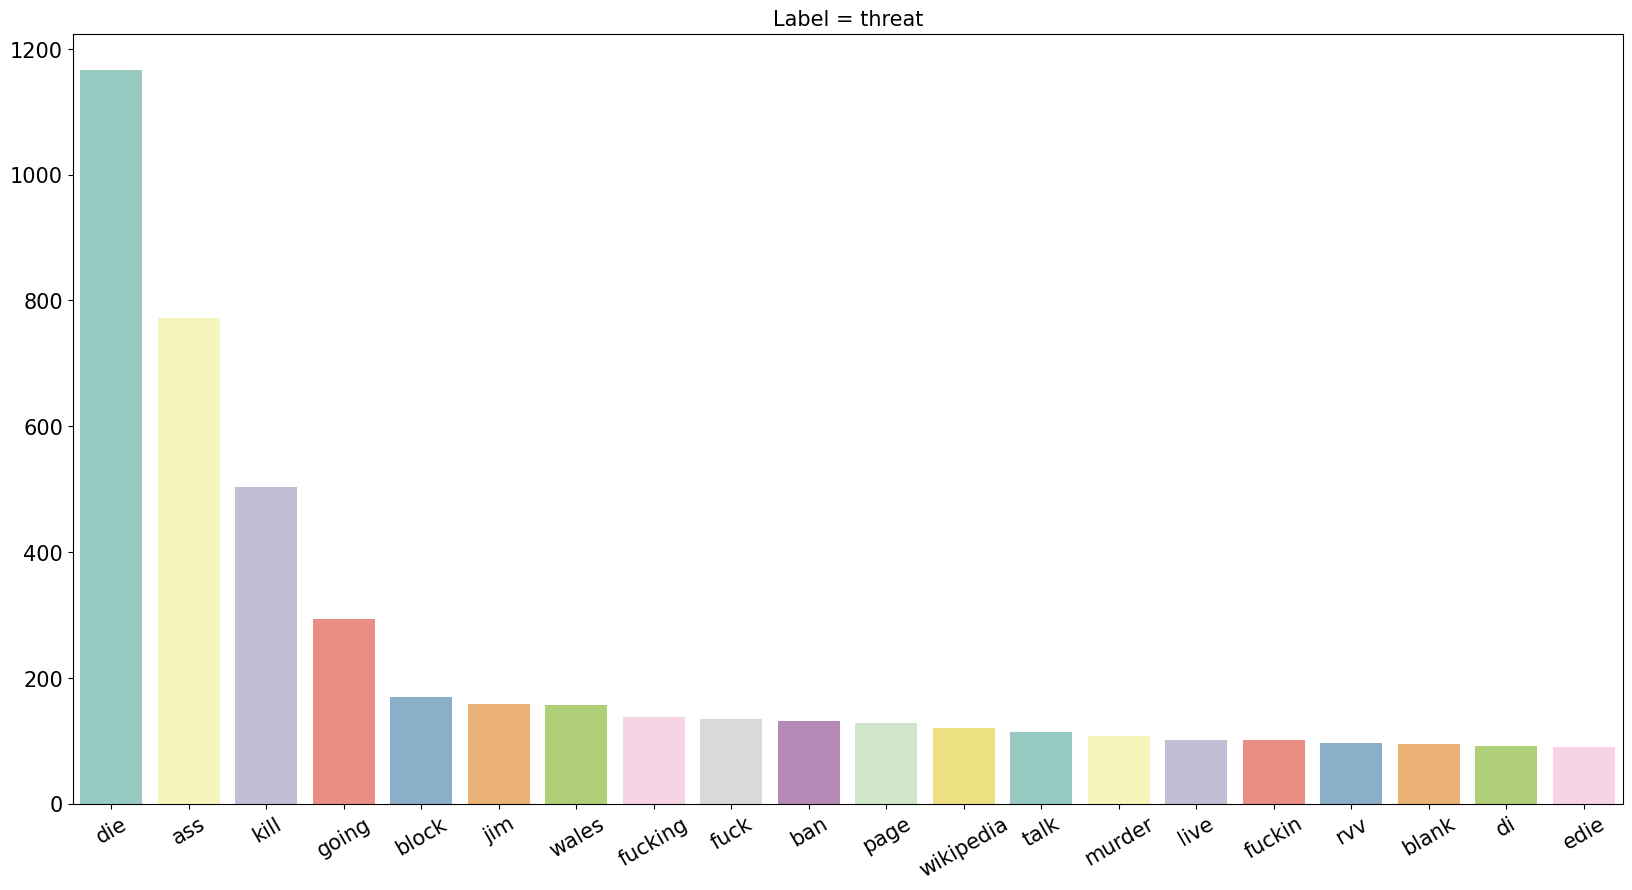

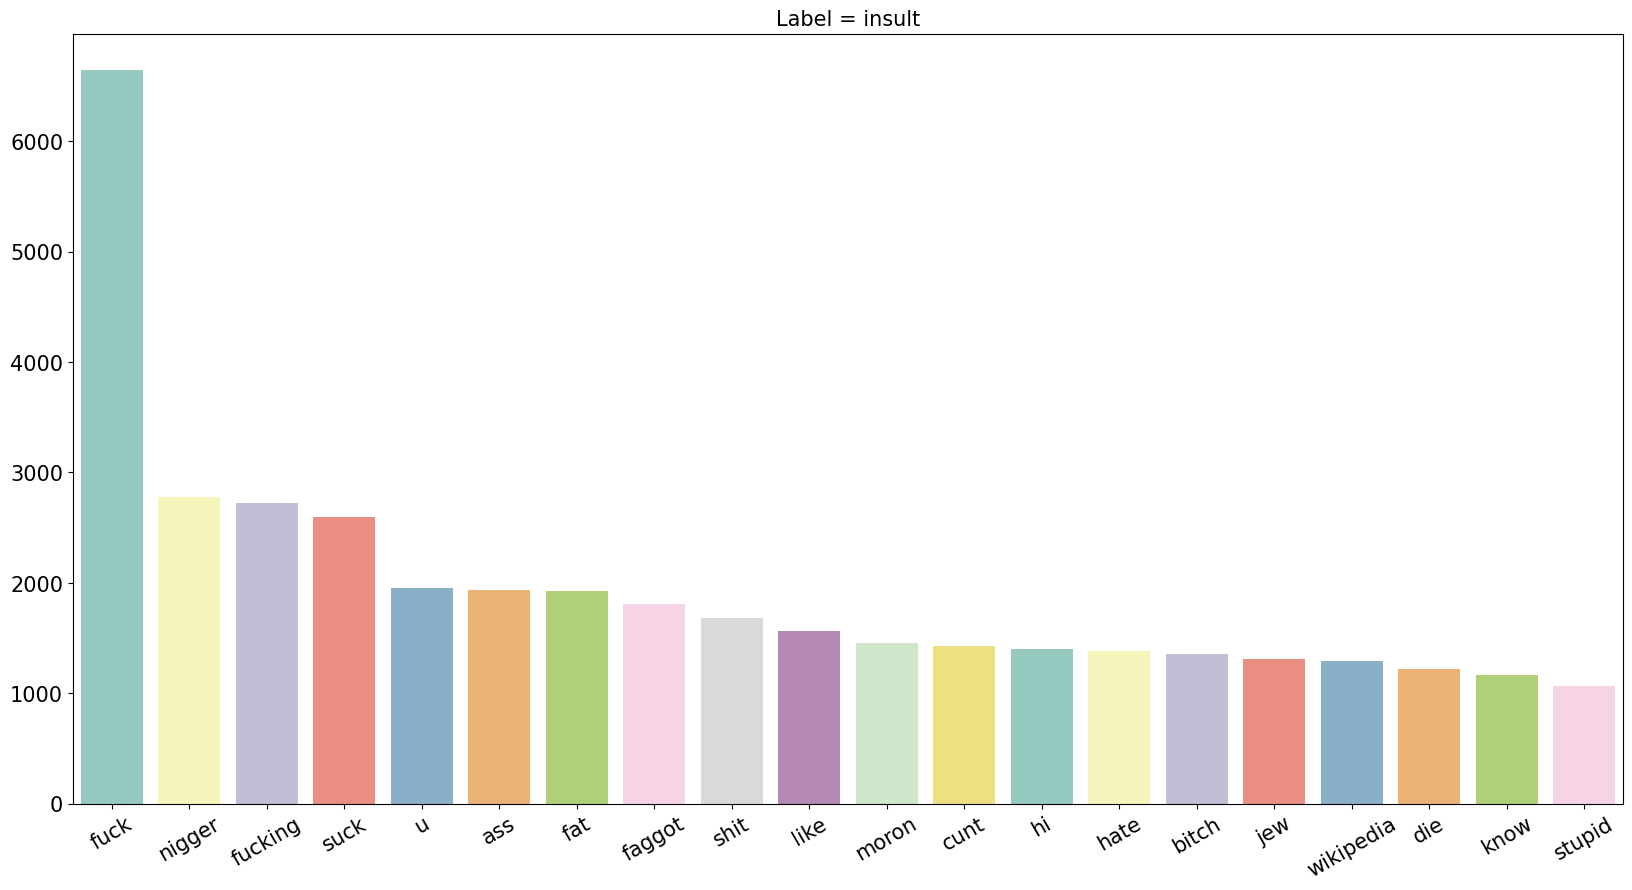

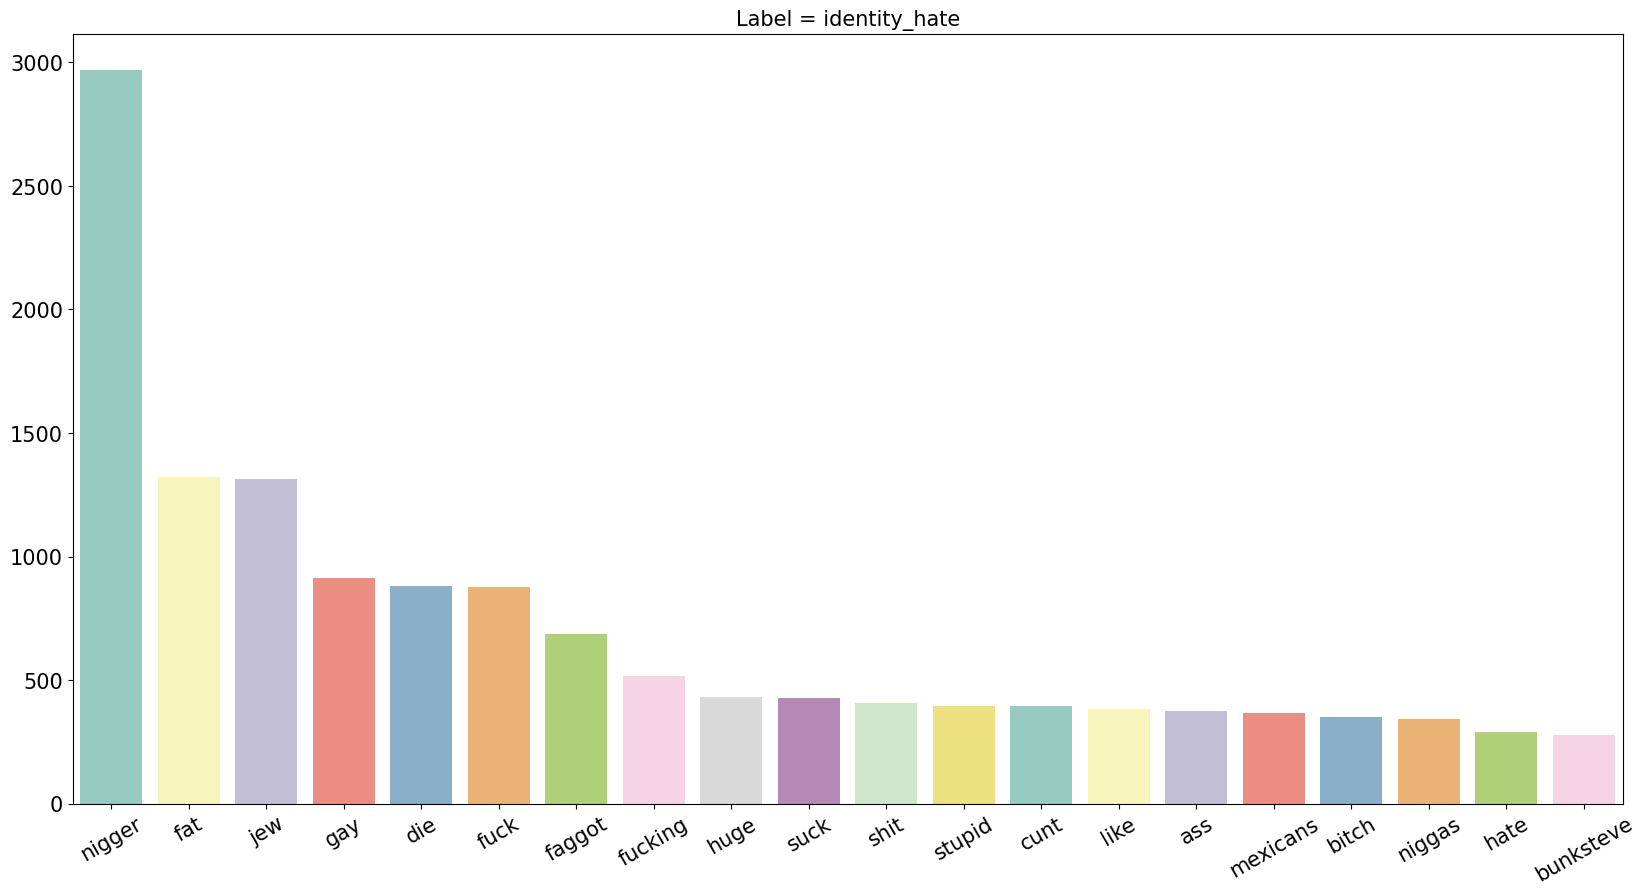

In [ ]:
# Trực quan hóa những từ thường gặp trong các bình luận xúc phạm
for label in target_columns:
    word_list = list(df.loc[df[label]==1, 'nonstop_tokens'].explode())
    most_common = Counter(word_list).most_common(20)
    words = [w for w,_ in most_common]
    counts = [c for _,c in most_common]
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(x=words, y=counts, palette='Set3')
    ax.set_title(f'Label = {label}', fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [ ]:
X = df['comment_text']
y = df[target_columns].values

In [ ]:
MAX_FEATURES = 20000 # số lượng từ trong vocal

# Vector hóa dữ liệu văn bản
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X.values)

vectorized_text = vectorizer(X.values)

In [ ]:
import pickle as pkl
with open('/content/drive/MyDrive/Colab Notebooks/vectorizer.pkl', 'wb') as f:
  pkl.dump(vectorizer.get_vocabulary(), f)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [ ]:
train = dataset.take(int(len(dataset)*.6))
val = dataset.skip(int(len(dataset)*.6)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))

In [ ]:
# Xây dựng mô hình với Sequential
model = Sequential()
# Lớp Embedding với số lượng từ vựng tối đa là 20000 từ đã xác định + 1 là những từ chưa xác định
model.add(Embedding(MAX_FEATURES + 1, 32))
# # Lớp Bidirectional để huấn luyện hai lớp LSTM theo 2 hướng thuận và ngược
model.add(Bidirectional(LSTM(32, activation='tanh')))
# 3 lớp Dense được sử dụng để tạo ra các đặc trưng
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Lớp Dropout để tránh overfitting
model.add(Dropout(0.5))
# Lớp cuối cùng có 6 nơ-ron tương ứng 6 cột taget_column với hàm kich hoạt  là sigmoid
model.add(Dense(6, activation='sigmoid'))

In [ ]:
# Biên soạn mô hình
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640032    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

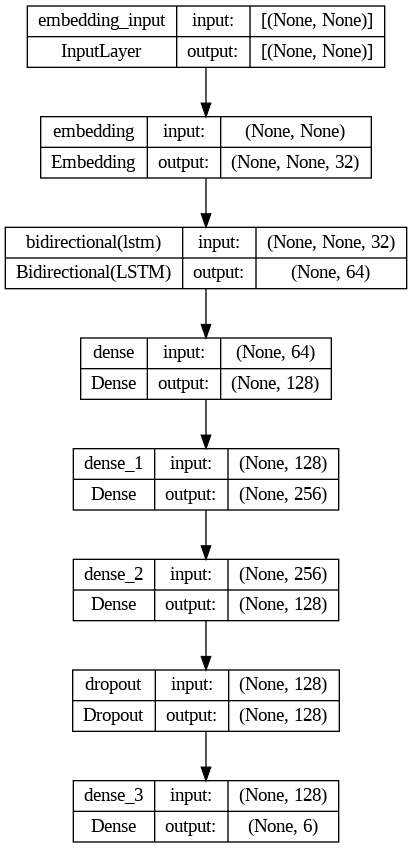

In [ ]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
# Huấn luyện mô hình
history = model.fit(train, epochs=5, batch_size=16, validation_data= val)

Epoch 1/5
5984/5984 [==============================] - 743s 123ms/step - loss: 0.0666 - accuracy: 0.9540 - precision: 0.7911 - recall: 0.5585 - val_loss: 0.0556 - val_accuracy: 0.9938 - val_precision: 0.9103 - val_recall: 0.4785
Epoch 2/5
5984/5984 [==============================] - 625s 104ms/step - loss: 0.0510 - accuracy: 0.9908 - precision: 0.8145 - recall: 0.6469 - val_loss: 0.0446 - val_accuracy: 0.9941 - val_precision: 0.8189 - val_recall: 0.6612
Epoch 3/5
5984/5984 [==============================] - 621s 104ms/step - loss: 0.0465 - accuracy: 0.9909 - precision: 0.8225 - recall: 0.6654 - val_loss: 0.0406 - val_accuracy: 0.9942 - val_precision: 0.8234 - val_recall: 0.7226
Epoch 4/5
5984/5984 [==============================] - 619s 103ms/step - loss: 0.0438 - accuracy: 0.9772 - precision: 0.8307 - recall: 0.6915 - val_loss: 0.0401 - val_accuracy: 0.9949 - val_precision: 0.8483 - val_recall: 0.7326
Epoch 5/5
5984/5984 [==============================] - 619s 103ms/step - loss: 0.041

<Figure size 2000x1000 with 0 Axes>

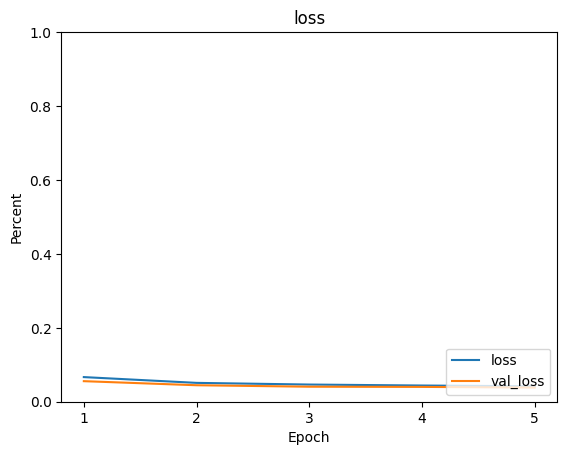

<Figure size 2000x1000 with 0 Axes>

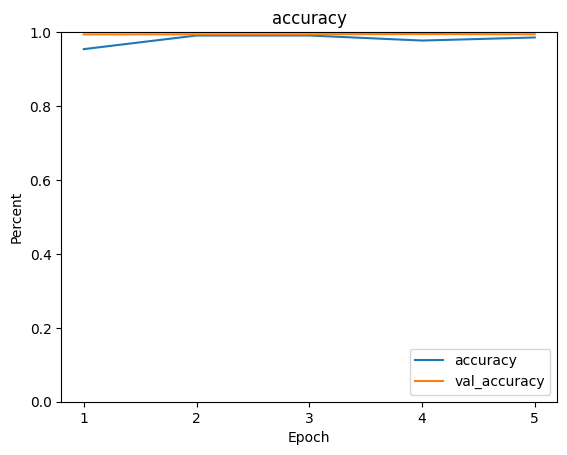

<Figure size 2000x1000 with 0 Axes>

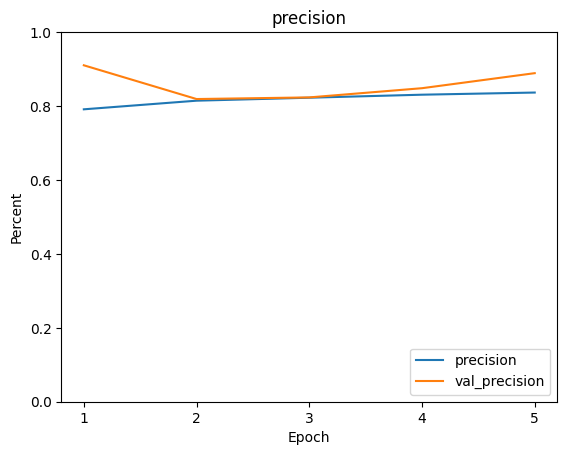

<Figure size 2000x1000 with 0 Axes>

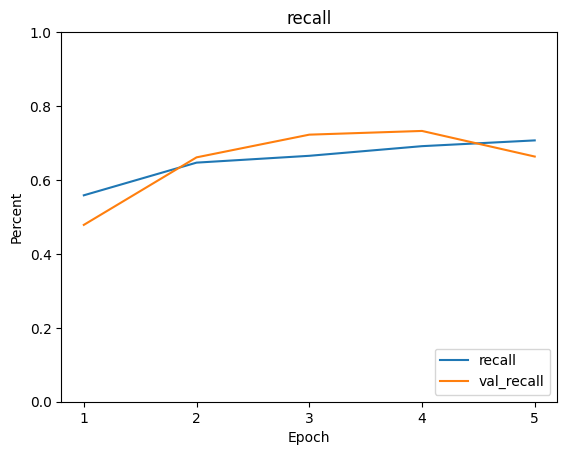

In [ ]:
# Trực quan hóa số liêu mô hình sau khi huấn luyện
metric = pd.DataFrame(history.history)
title = [['loss', 'val_loss'], ['accuracy', 'val_accuracy'], ['precision', 'val_precision'], ['recall', 'val_recall']]

for i in title:
    plt.figure(figsize=(20, 10))
    metric[i].plot()
    plt.title(i[0])
    plt.xlabel('Epoch')
    plt.ylabel('Percent')
    plt.xticks(ticks=range(len(metric)), labels = range(1, len(metric) + 1))
    plt.ylim(0.0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/model.weights.h5')

In [ ]:
# Tạo dữ đoán với câu mẫu
input_vectorized = vectorizer('You freaking suck! I am going to hit you.')
prediction = model.predict(np.expand_dims(input_vectorized, 0))
print(prediction)

1/1 [==============================] - 1s 812ms/step
[[0.9944014  0.15975945 0.92813945 0.0206924  0.7455434  0.07456216]]


<ipython-input-31-6a9c96f95285>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_columns, y=y, palette="muted")


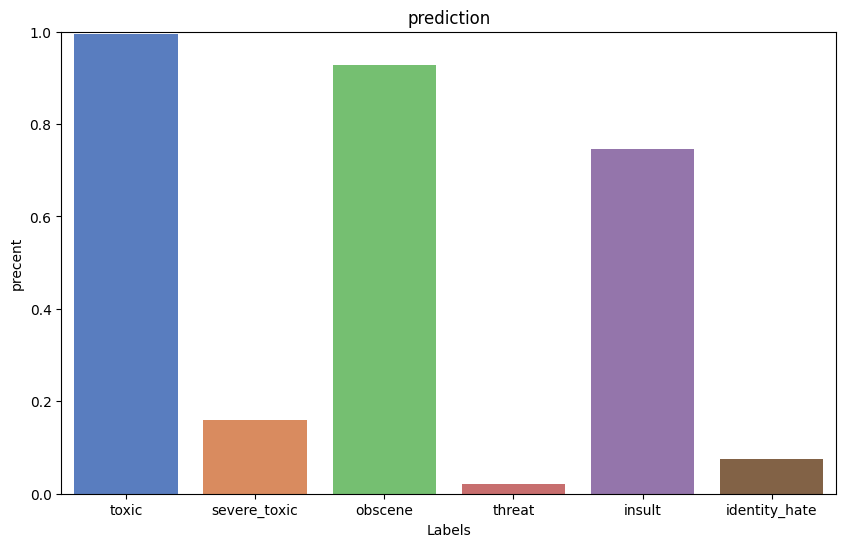

In [ ]:
# Trực quan hóa kết quả dự đoán
y = prediction.reshape(6)
# Tạo đồ thị
plt.figure(figsize=(10, 6))
sns.barplot(x=target_columns, y=y, palette="muted")
plt.title('prediction')
plt.ylabel('precent')
plt.xlabel('Labels')
plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
plt.show()

In [ ]:
# Tạo đánh giá dựa trên tập test
evalution = model.evaluate(test)

1994/1994 [==============================] - 91s 45ms/step - loss: 0.0382 - accuracy: 0.9942 - precision: 0.8923 - recall: 0.6709


<ipython-input-33-2c81f1ecf11d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=evalution, palette="viridis")


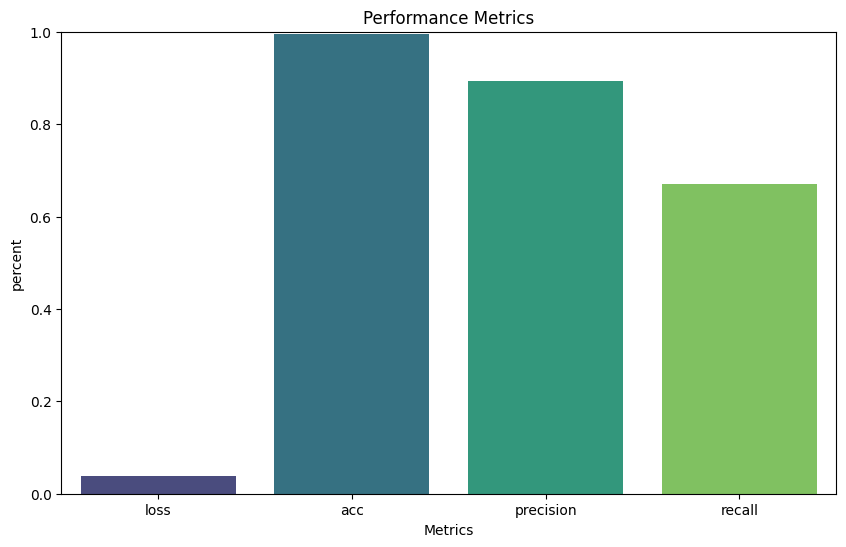

In [ ]:
# Trực quan hóa đánh giá
metrics = ['loss', 'acc', 'precision', 'recall'] # các thông số đánh giá
# Tạo đồ thị
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=evalution, palette="viridis")
plt.title('Performance Metrics')
plt.ylabel('percent')
plt.xlabel('Metrics')
plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
plt.show()

In [ ]:
# Load file test và file submid để chạy và submit lên kaggle
test_csv = pd.DataFrame(pd.read_csv('../jigsaw-toxic-comment-classification-challenge/test.csv/test.csv'))

sample_submission = pd.DataFrame(pd.read_csv('../jigsaw-toxic-comment-classification-challenge/sample_submission.csv/sample_submission.csv'))

In [ ]:
test_csv

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
sample_submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [ ]:
x_test = vectorizer(test_csv.comment_text)

In [ ]:
test_pred = model.predict(x_test)

4787/4787 [==============================] - 205s 43ms/step


In [ ]:
test_pred

array([[9.95734513e-01, 1.98669285e-01, 8.75116646e-01, 9.02678594e-02,
        8.29478383e-01, 2.46879965e-01],
       [7.91000857e-05, 1.24811840e-16, 4.51468082e-07, 3.71725697e-12,
        1.43304348e-07, 8.69199681e-08],
       [1.66411232e-02, 4.06267588e-08, 7.95828120e-04, 1.10697683e-05,
        8.80357460e-04, 4.88908787e-04],
       ...,
       [5.62849105e-04, 1.23641318e-13, 6.98348276e-06, 1.06111242e-09,
        3.88709441e-06, 1.88883701e-06],
       [7.62963609e-04, 3.30601838e-13, 1.01617461e-05, 2.88071877e-09,
        6.78832748e-06, 3.13453643e-06],
       [8.81393135e-01, 1.23992255e-02, 6.36147201e-01, 4.53005917e-03,
        3.62834513e-01, 2.50925403e-02]], dtype=float32)

In [ ]:
test_pred.shape

(153164, 6)

In [ ]:
sample_submission.loc[:, target_columns] = test_pred

In [ ]:
sample_submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.995735,1.986693e-01,8.751166e-01,9.026786e-02,8.294784e-01,2.468800e-01
1,0000247867823ef7,0.000079,1.248118e-16,4.514681e-07,3.717257e-12,1.433043e-07,8.691997e-08
2,00013b17ad220c46,0.016641,4.062676e-08,7.958281e-04,1.106977e-05,8.803575e-04,4.889088e-04
3,00017563c3f7919a,0.000048,1.956865e-17,2.286305e-07,7.612444e-13,5.883948e-08,3.431461e-08
4,00017695ad8997eb,0.005725,6.059532e-10,1.652735e-04,6.447601e-07,1.579052e-04,8.006937e-05
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.012323,1.130430e-08,4.710405e-04,5.180702e-06,5.175758e-04,2.778362e-04
153160,fffd7a9a6eb32c16,0.008883,3.477661e-09,3.152054e-04,2.046100e-06,3.193220e-04,1.647986e-04
153161,fffda9e8d6fafa9e,0.000563,1.236413e-13,6.983483e-06,1.061112e-09,3.887094e-06,1.888837e-06
153162,fffe8f1340a79fc2,0.000763,3.306018e-13,1.016175e-05,2.880719e-09,6.788327e-06,3.134536e-06


In [ ]:
sample_submission.to_csv('submission.csv', index=False)